In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from ml_modul import MlHandler

In [13]:
ml_handler = MlHandler(pd.read_csv('Consumo_cerveja.csv', parse_dates = ['Data']))

In [14]:
ml_handler.drop_na(columns=['Data'], inplace=True)
ml_handler.source.columns = ["date", "avgTemp", "minTemp", "maxTemp", "rain", "weekend", "litres"]

season = ['Winter', 'Spring', 'Summer', 'Autumn']

winter = []
spring = []
summer = []
autumn = []

for _,i in ml_handler.source.iterrows():
    winter.append(int(i.date.month in [12,1,2]))
    spring.append(int(i.date.month in [3,4,5]))
    summer.append(int(i.date.month in [6,7,8]))
    autumn.append(int(i.date.month in [9,10,11]))
ml_handler.source['winter'] = winter
ml_handler.source['spring'] = spring
ml_handler.source['summer'] = summer
ml_handler.source['autumn'] = autumn
del ml_handler.source['date']


In [15]:
ml_handler.source.litres = ml_handler.source.litres.astype("float")

In [16]:
ml_handler.source.corr()

,avgTemp,minTemp,maxTemp,rain,weekend,litres,winter,spring,summer,autumn
avgTemp,1.000000,0.862752,0.922513,0.024416,-0.050803,0.573881,0.520459,-0.127212,-0.475517,0.086390
minTemp,0.862752,1.000000,0.672929,0.098625,-0.059534,0.388986,0.572683,0.001015,-0.631027,0.061741
maxTemp,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.641233,0.429267,-0.169270,-0.333771,0.077193
rain,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.191566,0.143315,0.006820,-0.183738,0.034777
weekend,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.507127,-0.009067,0.010992,-0.002987,0.000999
litres,0.573881,0.388986,0.641233,-0.191566,0.507127,1.000000,0.227503,-0.165197,-0.176994,0.119129
winter,0.520459,0.572683,0.429267,0.143315,-0.009067,0.227503,1.000000,-0.332099,-0.332099,-0.329686
spring,-0.127212,0.001015,-0.169270,0.006820,0.010992,-0.165197,-0.332099,1.000000,-0.336996,-0.334548
summer,-0.475517,-0.631027,-0.333771,-0.183738,-0.002987,-0.176994,-0.332099,-0.336996,1.000000,-0.334548
autumn,0.086390,0.061741,0.077193,0.034777,0.000999,0.119129,-0.329686,-0.334548,-0.334548,1.000000


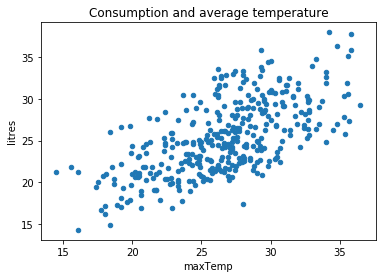

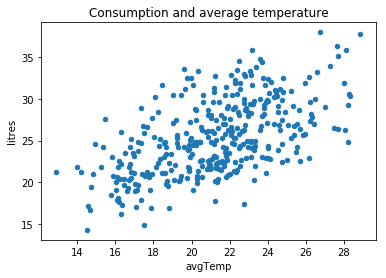

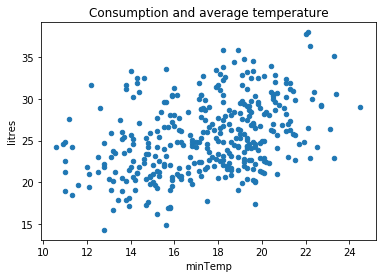

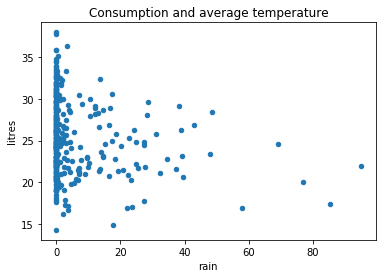

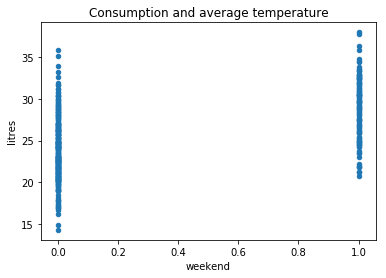

In [17]:
display(ml_handler.source.plot(kind='scatter', x="maxTemp", y="litres", title = "Consumption and average temperature"))
display(ml_handler.source.plot(kind='scatter', x="avgTemp", y="litres", title = "Consumption and average temperature"))
display(ml_handler.source.plot(kind='scatter', x="minTemp", y="litres", title = "Consumption and average temperature"))
display(ml_handler.source.plot(kind='scatter', x="rain", y="litres", title = "Consumption and average temperature"))
display(ml_handler.source.plot(kind='scatter', x="weekend", y="litres", title = "Consumption and average temperature"))

In [18]:
ml_handler.source

,avgTemp,minTemp,maxTemp,rain,weekend,litres,winter,spring,summer,autumn
0,27.30,23.9,32.5,0.0,0,NaN,1,0,0,0
1,27.02,24.5,33.5,0.0,0,28.972,1,0,0,0
2,24.82,22.4,29.9,0.0,1,30.814,1,0,0,0
3,23.98,21.5,28.6,1.2,1,29.799,1,0,0,0
4,23.82,21.0,28.3,0.0,0,28.900,1,0,0,0
5,23.78,20.1,30.5,12.2,0,28.218,1,0,0,0
6,24.00,19.5,33.7,0.0,0,29.732,1,0,0,0
7,24.90,19.5,32.8,48.6,0,28.397,1,0,0,0
8,28.20,21.9,34.0,4.4,0,24.886,1,0,0,0
9,26.76,22.1,34.2,0.0,1,37.937,1,0,0,0


In [19]:
ml_handler.linear_replace(inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
ml_handler.source

,avgTemp,minTemp,maxTemp,rain,weekend,litres,winter,spring,summer,autumn
0,27.30,23.9,32.5,0.0,0,28.187163,1,0,0,0
1,27.02,24.5,33.5,0.0,0,28.972000,1,0,0,0
2,24.82,22.4,29.9,0.0,1,30.814000,1,0,0,0
3,23.98,21.5,28.6,1.2,1,29.799000,1,0,0,0
4,23.82,21.0,28.3,0.0,0,28.900000,1,0,0,0
5,23.78,20.1,30.5,12.2,0,28.218000,1,0,0,0
6,24.00,19.5,33.7,0.0,0,29.732000,1,0,0,0
7,24.90,19.5,32.8,48.6,0,28.397000,1,0,0,0
8,28.20,21.9,34.0,4.4,0,24.886000,1,0,0,0
9,26.76,22.1,34.2,0.0,1,37.937000,1,0,0,0


In [21]:
ml_handler.source = ml_handler.scale(columns=["avgTemp", "minTemp", "maxTemp", "rain"])

C:\Users\Zaharchenko\Downloads\Telegram Desktop\ml_modul.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  numeric_data[column].max() - numeric_data[column].min())


In [22]:
y = ml_handler.source.litres
X = ml_handler.source.drop('litres', axis=1)

In [23]:
print("X shape", X.shape)
print("y shape", y.shape)

X shape (365, 9)
y shape (365,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [28]:
def show_metrics(model):
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)
    print("Train set")
    print("\tMSE", mean_squared_error(y_train, y_train_hat))
    print("\tMAE", mean_absolute_error(y_train, y_train_hat))
    print("Test set")
    print("\tMSE", mean_squared_error(y_test, y_pred))
    print("\tMAE", mean_absolute_error(y_test, y_pred))

show_metrics(linear)

Train set
	MSE 5.270565285932885
	MAE 1.9253161418160154
Test set
	MSE 4.805344464155552
	MAE 1.756213816618614


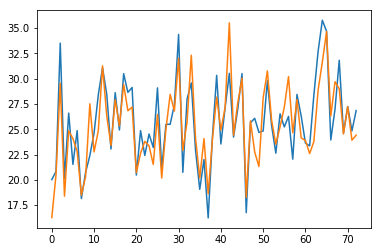

In [29]:
x = list(range(len(y_test)))
plt.plot(x, y_test)
plt.plot(x, y_pred)